This exercise is to define Dummy classification baselines and use them as reference.

In [1]:
import pandas as pd

adult_census = pd.read_csv("../dataset/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]

define a ShuffleSplit cross-validation strategy taking half of the samples as a testing at each round. Let us use 10 cross-validation rounds.

In [2]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.5, random_state=0)

 create a machine learning pipeline

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

classifier = make_pipeline(StandardScaler(), LogisticRegression())

Compute the cross-validation (test) scores for the classifier on this dataset.

In [4]:
from sklearn.model_selection import cross_validate

cv_results_logistic_regression = cross_validate(
    classifier, data, target, cv=cv, n_jobs=2
)

test_score_logistic_regression = pd.Series(
    cv_results_logistic_regression["test_score"], name="Logistic Regression"
)
test_score_logistic_regression

0    0.815937
1    0.813849
2    0.815036
3    0.815569
4    0.810982
5    0.814831
6    0.813112
7    0.810368
8    0.812375
9    0.816306
Name: Logistic Regression, dtype: float64

compute the cross-validation scores of a dummy classifier

In [5]:
from sklearn.dummy import DummyClassifier

most_frequent_classifier = DummyClassifier(strategy="most_frequent")
cv_results_most_frequent = cross_validate(
    most_frequent_classifier, data, target, cv=cv, n_jobs=2
)
test_score_most_frequent = pd.Series(
    cv_results_most_frequent["test_score"],
    name="Most frequent class predictor",
)
test_score_most_frequent

0    0.760329
1    0.756808
2    0.759142
3    0.760739
4    0.761681
5    0.761885
6    0.757463
7    0.757176
8    0.761885
9    0.763114
Name: Most frequent class predictor, dtype: float64

concatenate the test scores as columns a single pandas dataframe

In [6]:
all_test_scores = pd.concat(
    [test_score_logistic_regression, test_score_most_frequent],
    axis="columns",
)
all_test_scores

,Logistic Regression,Most frequent class predictor
0,0.815937,0.760329
1,0.813849,0.756808
2,0.815036,0.759142
3,0.815569,0.760739
4,0.810982,0.761681
5,0.814831,0.761885
6,0.813112,0.757463
7,0.810368,0.757176
8,0.812375,0.761885
9,0.816306,0.763114


plot the histogram of the cross-validation test scores for both models with the help of pandas built-in plotting function.

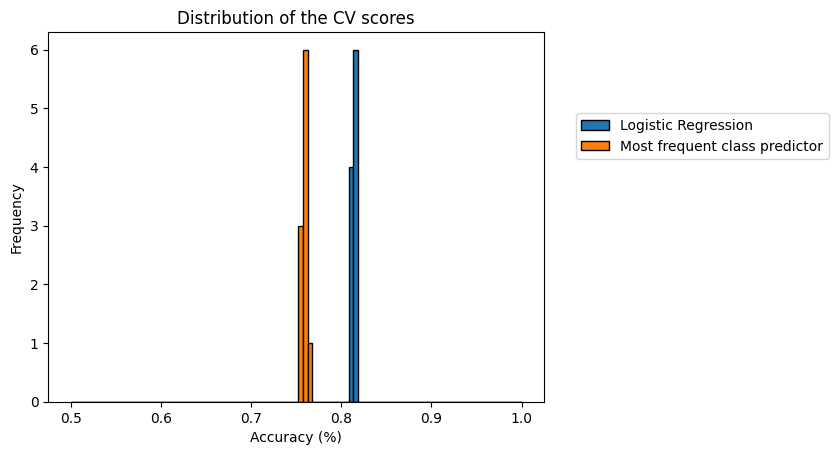

In [7]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(start=0.5, stop=1.0, num=100)
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the CV scores")

Change the strategy of the dummy classifier to "stratified", compute the results. Similarly compute scores for strategy="uniform" and then the plot the distribution together with the other results.

In [8]:
stratified_dummy = DummyClassifier(strategy="stratified")
cv_results_stratified = cross_validate(
    stratified_dummy, data, target, cv=cv, n_jobs=2
)
test_score_dummy_stratified = pd.Series(
    cv_results_stratified["test_score"], name="Stratified class predictor"
)

In [9]:
uniform_dummy = DummyClassifier(strategy="uniform")
cv_results_uniform = cross_validate(
    uniform_dummy, data, target, cv=cv, n_jobs=2
)
test_score_dummy_uniform = pd.Series(
    cv_results_uniform["test_score"], name="Uniform class predictor"
)

In [10]:
all_test_scores = pd.concat(
    [
        test_score_logistic_regression,
        test_score_most_frequent,
        test_score_dummy_stratified,
        test_score_dummy_uniform,
    ],
    axis="columns",
)

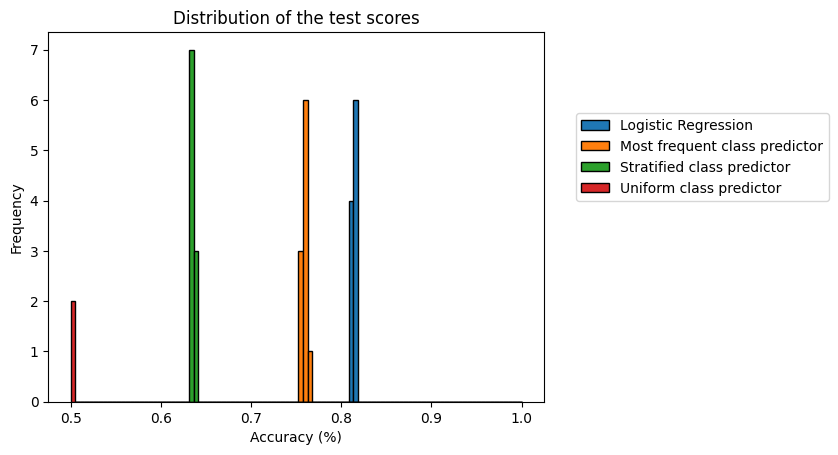

In [11]:
all_test_scores.plot.hist(bins=bins, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Accuracy (%)")
_ = plt.title("Distribution of the test scores")